In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from konlpy.tag import Kkma
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm
from wordcloud import WordCloud
import koreanize_matplotlib

### 전처리 된 데이터 불러오기

In [27]:
news20 = pd.read_csv("data/news20_전처리.csv")
news21 = pd.read_csv("data/news21_전처리.csv")
news22 = pd.read_csv("data/news22_전처리.csv")

### Okt 이용한 빈도 수 분석

In [62]:

# Okt 이용

# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '및', '그', '방법', '년부터']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_2020 = []
for sentence in tqdm(news20["기사 제목"]):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_2020.append(tokenized_sentence)
    
tokenized_2021 = []
for sentence in tqdm(news21["기사 제목"]):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_2021.append(stopwords_removed_sentence)

tokenized_2022 = []
for sentence in tqdm(news22["기사 제목"]):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_2022.append(stopwords_removed_sentence)


100%|██████████| 2852/2852 [00:01<00:00, 1676.19it/s]


In [64]:
tokenized_2020[:10]

[['은평구', '문화', '교실', '댕댕', '이', '스쿨', '운영'],
 ['새해', '부터', '미용사', '나무', '의사', '도', '신', '중년', '고용', '장려', '금', '받다'],
 ['반려', '식물', '로', '코로나', '우울', '해소'],
 ['우리', '아이', '와', '함께', '생활', '하다', '괜찮다'],
 ['영상', '식품', '의', '세계', '화', '정부', '지원', '받다', '글로벌', '기업', '으로', '우뚝'],
 ['배스', '사들이다', '반려동물', '식품', '제조', '빈집', '고치다', '장기', '거주', '사회', '주택', '제공'],
 ['반려동물', '도', '코로나', '블루', '쿠쿠', '전자', '넬', '로', '팻', '케어', '제품', '수요', '증가'],
 ['년', '부터', '동물보호법', '상', '맹견', '은', '책임', '보험', '의무', '화'],
 ['웰컴', '투', '펫팸', '반려동물', '도', '쇼크', '로', '쓰러지다'],
 ['지솔펫', '반려동물', '을', '살균', '소독', '향균', '탈취', '제', '선보이다']]

기사의 최대 길이 : 18
기사의 평균 길이 : 9.448070175438597


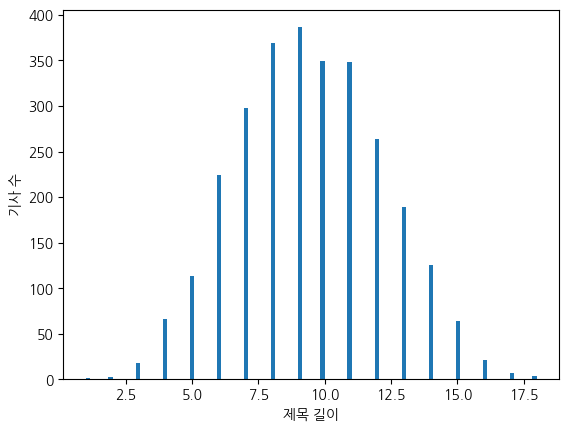

In [67]:

print('기사의 최대 길이 :',max(len(article) for article in tokenized_2020))
print('기사의 평균 길이 :',sum(map(len, tokenized_2020))/len(tokenized_2020))
plt.hist([len(article) for article in tokenized_2020], bins=100)
plt.xlabel('제목 길이')
plt.ylabel('기사 수')
plt.show()


In [31]:

# 단어 집합(Vocabulary)을 만들기 위해서 문장의 경계인 [, ]를 제거하고 단어들을 하나의 리스트로 만든다.
vocab_2020 = sum(tokenized_2020, [])
print(vocab_2020[:10])


['은평구', '문화', '교실', '댕댕', '이', '스쿨', '운영', '새해', '부터', '미용사']


In [32]:

vocab_2021 = sum(tokenized_2021, [])
print(vocab_2021[:10])


['이재명', '코로나', '거점', '전담', '병원', '방문', '유튜브', '출연', '함께', '즐기다']


In [33]:

vocab_2022 = sum(tokenized_2022, [])
print(vocab_2022[:10])


['대통령', '은퇴', '안내견', '입양', '관저', '번째', '동물', '식구', '종합', '윤']


In [34]:

from collections import Counter
def top_20_words(tokens):
    word_counts = Counter(tokens)
    return word_counts.most_common(20)


In [69]:

# 명사만 추출해보자
# nouns라는 편리한 함수가 있으니 명사 빈도 계산은 코드 몇줄이면 끝난다. 
#출처: https://liveyourit.tistory.com/57

# "phrase input should be string, not <class 'list'>" 에러 해결해주기 위해 넣었습니다.
phrase_string = " ".join(vocab_2020)

# okt 객체 생성
okt = Okt()
noun = okt.nouns(phrase_string)
for i,v in enumerate(noun):
	if len(v)<2:
		noun.pop(i)
count = Counter(noun)
	

# 명사 빈도 카운트
noun_list20 = count.most_common(50)
n = 0
for v in noun_list20:
	if n == 20:
		break
	print(v)
	n += 1

('반려동물', 444)
('동물', 181)
('반려', 161)
('문화', 135)
('건강', 133)
('센터', 122)
('코로나', 112)
('서비스', 104)
('강아지', 101)
('무료', 99)
('분양', 96)
('고양이', 94)
('진료', 90)
('지원', 80)
('입양', 80)
('온라인', 77)
('한국', 76)
('자격증', 75)
('산업', 73)
('유기동물', 73)


In [71]:

phrase_string = " ".join(vocab_2021)

# okt 객체 생성
okt = Okt()
noun = okt.nouns(phrase_string)
for i,v in enumerate(noun):
	if len(v)<2:
		noun.pop(i)
count = Counter(noun)
	

# 명사 빈도 카운트
noun_list21 = count.most_common(50)
n=0
for v in noun_list21:
	if n == 20:
		break
	print(v)
	n += 1

('반려동물', 362)
('동물', 245)
('반려', 156)
('건강', 129)
('문화', 125)
('센터', 121)
('시장', 89)
('산업', 88)
('이야기', 85)
('등록', 82)
('지원', 72)
('보건', 71)
('플랫폼', 68)
('브랜드', 67)
('동물병원', 66)
('진료', 65)
('파크', 65)
('사랑', 64)
('대상', 62)
('사업', 60)


In [72]:

phrase_string = " ".join(vocab_2022)

# okt 객체 생성
okt = Okt()
noun = okt.nouns(phrase_string)
for i,v in enumerate(noun):
	if len(v)<2:
		noun.pop(i)
count = Counter(noun)
	

# 명사 빈도 카운트
noun_list22 = count.most_common(50)
n=0
for v in noun_list22:
	if n == 20:
		break
	print(v)
	n += 1

('반려동물', 433)
('동물', 305)
('문화', 208)
('반려', 156)
('센터', 126)
('동물복지', 116)
('지원', 116)
('대상', 113)
('건강', 103)
('산업', 95)
('사업', 91)
('입양', 87)
('수상', 82)
('시장', 79)
('진행', 78)
('케어', 74)
('유기동물', 73)
('서비스', 73)
('용품', 71)
('축제', 70)


### Tf-idf 분석

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Use the fit_transform method to calculate the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(news20["기사 제목"])

# Get the feature names (the words)
feature_names = vectorizer.get_feature_names()

# Calculate the mean TF-IDF value for each word
mean_tfidf = np.mean(tfidf_matrix, axis=0)

# Zip the feature names and mean TF-IDF values together
mean_tfidf_by_word = zip(feature_names, mean_tfidf.A1)

# Sort the words by their mean TF-IDF value in descending order
sorted_mean_tfidf_by_word = sorted(mean_tfidf_by_word, key=lambda x: x[1], reverse=True)

# Select the top 10 words with the highest mean TF-IDF value
top_50_words20 = sorted_mean_tfidf_by_word[:50]

# Print the top 50 words with the highest mean TF-IDF value
n=0
for word, mean_tfidf in top_50_words20:
    if n ==20:
        break
    print(word, ":", mean_tfidf)
    n+=1

코로나 : 0.009300008678286712
진료비 : 0.00813459655636439
서비스 : 0.007724140110115819
반려동물관리사 : 0.007135837370652081
경기도 : 0.006817399498841591
온라인 : 0.006743869089029516
진행 : 0.006588245710647893
이벤트 : 0.006504234543501847
자격증 : 0.00650234848701338
함께 : 0.005869394326358976
강아지 : 0.0057078624817793735
무료수강 : 0.005689253864680874
펫시터 : 0.005676926350857059
건강이야기 : 0.005436460029691454
고양이 : 0.0054307946583804145
실시 : 0.0054095811043754745
지원 : 0.005240733698111301
사료 : 0.0051539752281826185
시대 : 0.005150230035692807
운영 : 0.004998413691721981


/Users/moksu/miniforge3/envs/lion/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [74]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Use the fit_transform method to calculate the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(news21["기사 제목"])

# Get the feature names (the words)
feature_names = vectorizer.get_feature_names()

# Calculate the mean TF-IDF value for each word
mean_tfidf = np.mean(tfidf_matrix, axis=0)

# Zip the feature names and mean TF-IDF values together
mean_tfidf_by_word = zip(feature_names, mean_tfidf.A1)

# Sort the words by their mean TF-IDF value in descending order
sorted_mean_tfidf_by_word = sorted(mean_tfidf_by_word, key=lambda x: x[1], reverse=True)

# Select the top 10 words with the highest mean TF-IDF value
top_50_words21 = sorted_mean_tfidf_by_word[:50]

# Print the top 50 words with the highest mean TF-IDF value
n=0
for word, mean_tfidf in top_50_words21:
    if n ==20:
        break
    print(word, ":", mean_tfidf)
    n+=1

함께 : 0.007189915556103135
시장 : 0.006687013120736121
건강이야기 : 0.006448524390768458
플랫폼 : 0.006378909582637595
브랜드 : 0.006214832571588373
오픈 : 0.005746501336545573
개장 : 0.005424773425144169
론칭 : 0.005148149484443192
공개 : 0.005076398206749815
대전시 : 0.005030794203863901
전용 : 0.005000805716996185
동물병원 : 0.004961255709359427
진행 : 0.004918378228131769
사료 : 0.004809586624381672
최초 : 0.004748656991313522
코로나 : 0.004707741663443171
선정 : 0.004672418342464735
동물 : 0.004528930731576461
국내 : 0.004510798768833687
운영 : 0.004508704252292864


/Users/moksu/miniforge3/envs/lion/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [75]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Use the fit_transform method to calculate the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(news22["기사 제목"])

# Get the feature names (the words)
feature_names = vectorizer.get_feature_names()

# Calculate the mean TF-IDF value for each word
mean_tfidf = np.mean(tfidf_matrix, axis=0)

# Zip the feature names and mean TF-IDF values together
mean_tfidf_by_word = zip(feature_names, mean_tfidf.A1)

# Sort the words by their mean TF-IDF value in descending order
sorted_mean_tfidf_by_word = sorted(mean_tfidf_by_word, key=lambda x: x[1], reverse=True)

# Select the top 10 words with the highest mean TF-IDF value
top_50_words22 = sorted_mean_tfidf_by_word[:50]

# Print the top 50 words with the highest mean TF-IDF value
n=0
for word, mean_tfidf in top_50_words22:
    if n ==20:
        break
    print(word, ":", mean_tfidf)
    n+=1


수상 : 0.00849491962960024
진행 : 0.007722163708320733
함께 : 0.007486567031479563
동물 : 0.0073751072265764075
유기동물 : 0.006363426317928255
서비스 : 0.006137684550574558
대상 : 0.0060404685767806035
대한민국 : 0.006016073611293757
시장 : 0.006002205051526312
지원 : 0.005897472443275732
신설 : 0.005356793840760422
할인 : 0.0053017419548936845
건강이야기 : 0.00524969619027493
농식품부 : 0.005013063267636955
영양제 : 0.004899352218151866
입양 : 0.004751732924128358
함께하는 : 0.004697918431216515
문화축제 : 0.004555315511170626
동물복지 : 0.00454238471064306
문화교실 : 0.004509607045041166


/Users/moksu/miniforge3/envs/lion/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [76]:
df_idf20 = pd.DataFrame(top_50_words20).set_index(0).sort_values(by =1,ascending=False).T
df_idf20 = pd.DataFrame(df_idf20.iloc[0,:50])
df_idf20["word"] = df_idf20.index
df_idf20["빈도"] = df_idf20[1]*100
df_idf20 = df_idf20.drop(columns=1)
df_idf20 = df_idf20.reset_index()
df_idf20 = df_idf20.drop(columns = 0)
df_idf20.head()

,word,빈도
0,코로나,0.930001
1,진료비,0.813460
2,서비스,0.772414
3,반려동물관리사,0.713584
4,경기도,0.681740


In [77]:
df_idf21 = pd.DataFrame(top_50_words21).set_index(0).sort_values(by =1,ascending=False).T
df_idf21 = pd.DataFrame(df_idf21.iloc[0,:50])
df_idf21["word"] = df_idf21.index
df_idf21["빈도"] = df_idf21[1]*100
df_idf21 = df_idf21.drop(columns=1)
df_idf21 = df_idf21.reset_index()
df_idf21 = df_idf21.drop(columns = 0)
df_idf21.head()

,word,빈도
0,함께,0.718992
1,시장,0.668701
2,건강이야기,0.644852
3,플랫폼,0.637891
4,브랜드,0.621483


In [43]:
df_idf22 = pd.DataFrame(top_50_words22).set_index(0).sort_values(by =1,ascending=False).T
df_idf22 = pd.DataFrame(df_idf22.iloc[0,:50])
df_idf22["word"] = df_idf22.index
df_idf22["빈도"] = df_idf22[1]*100
df_idf22 = df_idf22.drop(columns=1)
df_idf22 = df_idf22.reset_index()
df_idf22 = df_idf22.drop(columns = 0)
df_idf22.head()

,word,빈도
0,수상,0.849492
1,진행,0.772216
2,함께,0.748657
3,동물,0.737511
4,유기동물,0.636343


### Tf-idf 시각화

<AxesSubplot: xlabel='빈도', ylabel='word'>

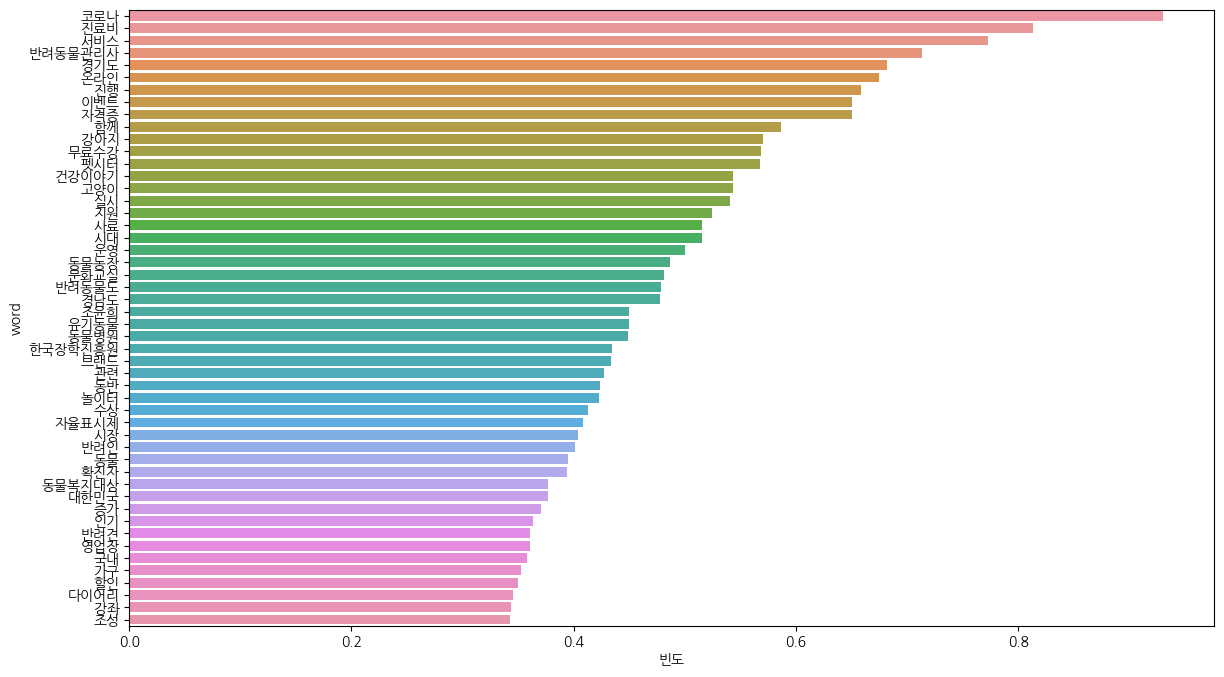

In [44]:
# Tf-idf 시각화
plt.figure(figsize=(14,8))
sns.barplot(data = df_idf20, x= '빈도', y= 'word')

<AxesSubplot: xlabel='빈도', ylabel='word'>

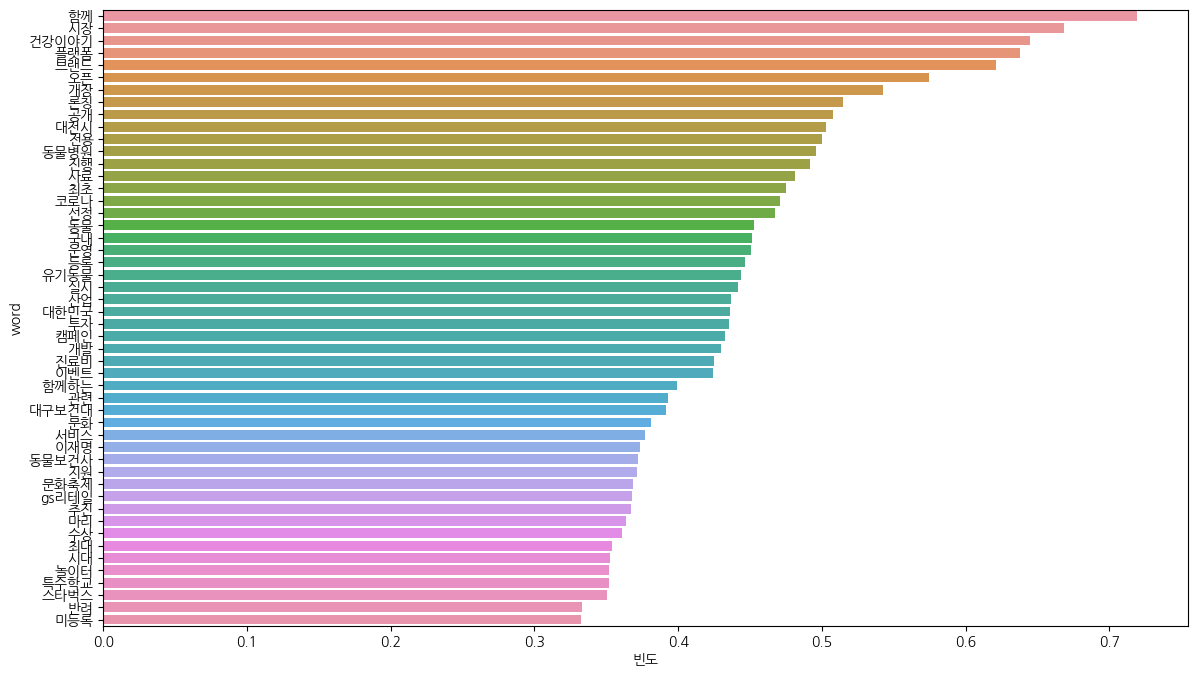

In [45]:
plt.figure(figsize=(14,8))
sns.barplot(data = df_idf21, x= '빈도', y= 'word')

<AxesSubplot: xlabel='빈도', ylabel='word'>

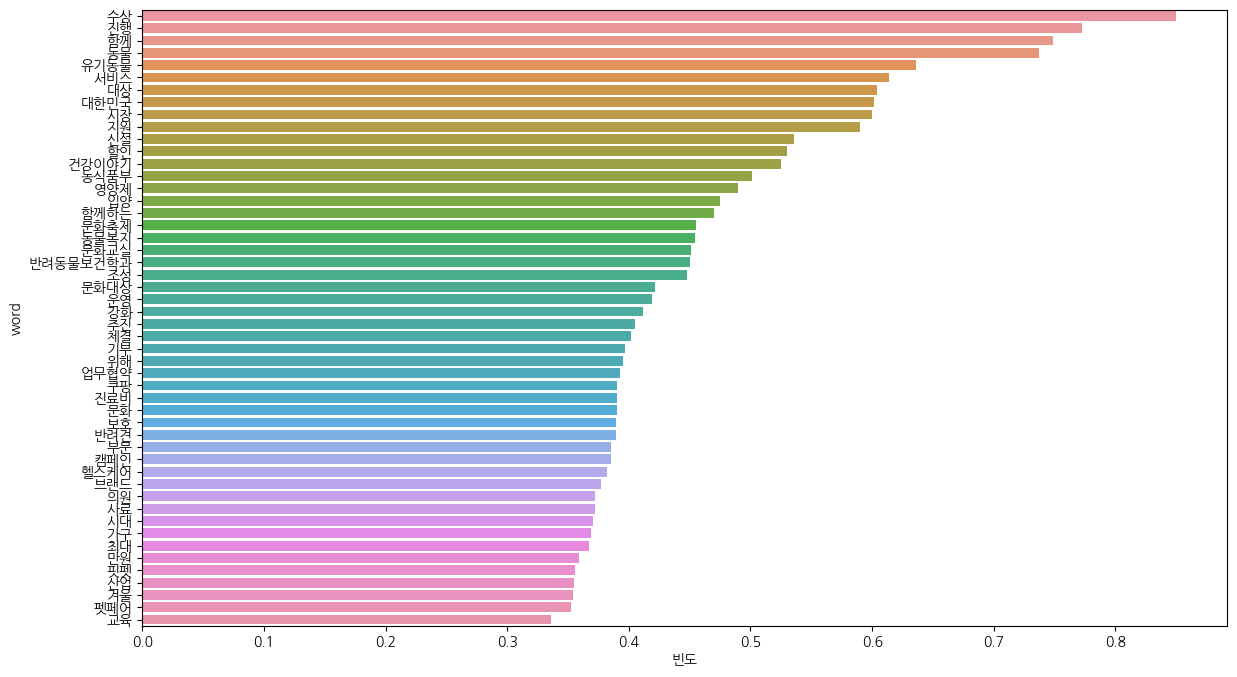

In [46]:
plt.figure(figsize=(14,8))
sns.barplot(data = df_idf22, x= '빈도', y= 'word')

### Word2Vec 모델링

In [56]:
model = Word2Vec(sentences = tokenized_2020, window = 5, min_count = 5, workers = 4, sg = 0)

In [57]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(1176, 100)

In [58]:
print(model.wv.most_similar("반려동물"))

[('하다', 0.9996736645698547), ('과', 0.9996486902236938), ('와', 0.9996411204338074), ('펫', 0.9996331930160522), ('에', 0.999616801738739), ('의', 0.9996015429496765), ('동물', 0.9995842576026917), ('한', 0.9995800256729126), ('문화', 0.9995783567428589), ('강아지', 0.9995699524879456)]


In [50]:
print(model.wv.most_similar("펫"))

[('에', 0.9997551441192627), ('하다', 0.999749481678009), ('과', 0.9997276663780212), ('한', 0.9997259378433228), ('의', 0.9997134208679199), ('동물', 0.9996872544288635), ('반려', 0.9996820092201233), ('까지', 0.9996774196624756), ('이', 0.9996673464775085), ('와', 0.9996658563613892)]


In [51]:
print(model.wv.most_similar("산업"))

[('이', 0.99969881772995), ('동물', 0.9996772408485413), ('하다', 0.9996764659881592), ('의', 0.9996693134307861), ('과', 0.9996431469917297), ('에', 0.9996241331100464), ('펫', 0.9995995163917542), ('로', 0.999588668346405), ('센터', 0.9995808005332947), ('개', 0.9995576739311218)]
